# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape

(404, 13)

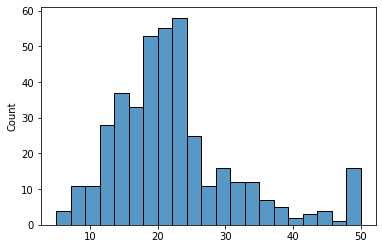

In [3]:
sns.histplot(y_train)
plt.show()

In [5]:
#pd.DataFrame(X_train).info()
#pd.DataFrame(X_train).describe()

❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [5]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

dummy_reg = DummyRegressor(strategy = "mean")
dummy_reg = dummy_reg.fit(X_train, y_train)

In [6]:
MAE_dummy = cross_val_score(dummy_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error", n_jobs=2)
print("Mean MAE: ", -np.mean(MAE_dummy).round(6), "\tStd: ", np.std(MAE_dummy).round(6))

Mean MAE:  6.662596 	Std:  1.220317


In [7]:
MAE_dummy

array([-7.28470067, -7.30659141, -7.68768393, -6.27018746, -5.1478022 ,
       -5.0189011 , -6.10563187, -8.52266484, -8.0757967 , -5.20600275])

In [10]:
MAE_dummy = cross_val_score(dummy_reg, X_test, y_test, cv=10, scoring="neg_mean_absolute_error", n_jobs=2)
print("Mean MAE: ", -np.mean(MAE_dummy).round(6), "\tStd: ", np.std(MAE_dummy).round(6))

Mean MAE:  6.731623 	Std:  1.995709


In [11]:
MAE_baseline = -np.mean(MAE_dummy).round(6)

# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation = 'relu', input_dim=13)) #activation='sigmoid', input_shape=(2,)
    model.add(layers.Dense(7, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'relu'))    
    return model

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [16]:
def compile_model(model, optimizer_name):
    model.compile(optimizer=optimizer_name, loss='mse', metrics=['mean_absolute_error'])    
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.005, restore_best_weights=True)#baseline=
model = initialize_model()
model = compile_model(model, 'adam')
history = model.fit(X_train, y_train, batch_size=15, epochs=300, validation_split=0.2, callbacks=[es], verbose=1)

Epoch 1/300
22/22 [==============================] - 0s 14ms/step - loss: 557.2828 - mean_absolute_error: 21.7877 - val_loss: 616.3278 - val_mean_absolute_error: 23.1235
Epoch 2/300
22/22 [==============================] - 0s 5ms/step - loss: 536.1661 - mean_absolute_error: 21.3991 - val_loss: 589.6674 - val_mean_absolute_error: 22.6284
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 510.1699 - mean_absolute_error: 20.9207 - val_loss: 560.0508 - val_mean_absolute_error: 22.0439
Epoch 4/300
22/22 [==============================] - 0s 3ms/step - loss: 480.8427 - mean_absolute_error: 20.3395 - val_loss: 527.4517 - val_mean_absolute_error: 21.3505
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 448.2625 - mean_absolute_error: 19.6303 - val_loss: 489.1362 - val_mean_absolute_error: 20.4929
Epoch 6/300
22/22 [==============================] - 0s 3ms/step - loss: 410.7822 - mean_absolute_error: 18.7602 - val_loss: 448.0348 - val_mean_absolute_

22/22 [==============================] - 0s 3ms/step - loss: 19.1784 - mean_absolute_error: 3.0515 - val_loss: 24.7617 - val_mean_absolute_error: 3.7123
Epoch 51/300
22/22 [==============================] - 0s 3ms/step - loss: 18.8390 - mean_absolute_error: 3.0245 - val_loss: 24.2708 - val_mean_absolute_error: 3.6794
Epoch 52/300
22/22 [==============================] - 0s 3ms/step - loss: 18.4256 - mean_absolute_error: 2.9861 - val_loss: 23.8246 - val_mean_absolute_error: 3.6271
Epoch 53/300
22/22 [==============================] - 0s 3ms/step - loss: 18.0514 - mean_absolute_error: 2.9486 - val_loss: 23.5086 - val_mean_absolute_error: 3.6090
Epoch 54/300
22/22 [==============================] - 0s 3ms/step - loss: 17.6630 - mean_absolute_error: 2.9196 - val_loss: 23.0390 - val_mean_absolute_error: 3.5596
Epoch 55/300
22/22 [==============================] - 0s 4ms/step - loss: 17.3690 - mean_absolute_error: 2.8864 - val_loss: 22.7526 - val_mean_absolute_error: 3.5369
Epoch 56/300
22/2

22/22 [==============================] - 0s 3ms/step - loss: 9.9792 - mean_absolute_error: 2.1583 - val_loss: 17.5908 - val_mean_absolute_error: 2.9061
Epoch 100/300
22/22 [==============================] - 0s 3ms/step - loss: 9.8741 - mean_absolute_error: 2.1434 - val_loss: 17.4186 - val_mean_absolute_error: 2.8571
Epoch 101/300
22/22 [==============================] - 0s 3ms/step - loss: 9.9025 - mean_absolute_error: 2.1380 - val_loss: 17.2829 - val_mean_absolute_error: 2.8723
Epoch 102/300
22/22 [==============================] - 0s 3ms/step - loss: 9.8354 - mean_absolute_error: 2.1434 - val_loss: 17.5772 - val_mean_absolute_error: 2.8847
Epoch 103/300
22/22 [==============================] - 0s 2ms/step - loss: 9.6943 - mean_absolute_error: 2.1320 - val_loss: 17.3982 - val_mean_absolute_error: 2.8422
Epoch 104/300
22/22 [==============================] - 0s 3ms/step - loss: 9.6223 - mean_absolute_error: 2.1205 - val_loss: 17.3402 - val_mean_absolute_error: 2.8589
Epoch 105/300
22/2

22/22 [==============================] - 0s 3ms/step - loss: 8.4527 - mean_absolute_error: 2.0047 - val_loss: 15.8966 - val_mean_absolute_error: 2.7206
Epoch 149/300
22/22 [==============================] - 0s 3ms/step - loss: 8.4746 - mean_absolute_error: 1.9953 - val_loss: 15.8086 - val_mean_absolute_error: 2.7168
Epoch 150/300
22/22 [==============================] - 0s 3ms/step - loss: 8.4133 - mean_absolute_error: 1.9973 - val_loss: 15.8597 - val_mean_absolute_error: 2.7204
Epoch 151/300
22/22 [==============================] - 0s 3ms/step - loss: 8.4108 - mean_absolute_error: 1.9881 - val_loss: 15.4503 - val_mean_absolute_error: 2.6770
Epoch 152/300
22/22 [==============================] - 0s 3ms/step - loss: 8.4050 - mean_absolute_error: 1.9852 - val_loss: 15.4775 - val_mean_absolute_error: 2.6908
Epoch 153/300
22/22 [==============================] - 0s 3ms/step - loss: 8.4364 - mean_absolute_error: 1.9889 - val_loss: 15.6977 - val_mean_absolute_error: 2.7112
Epoch 154/300
22/2

22/22 [==============================] - 0s 3ms/step - loss: 7.8823 - mean_absolute_error: 1.9259 - val_loss: 14.6098 - val_mean_absolute_error: 2.6340
Epoch 198/300
22/22 [==============================] - 0s 3ms/step - loss: 7.8905 - mean_absolute_error: 1.9342 - val_loss: 14.5573 - val_mean_absolute_error: 2.6269
Epoch 199/300
22/22 [==============================] - 0s 2ms/step - loss: 8.0223 - mean_absolute_error: 1.9654 - val_loss: 14.6502 - val_mean_absolute_error: 2.6362
Epoch 200/300
22/22 [==============================] - 0s 3ms/step - loss: 7.8671 - mean_absolute_error: 1.9282 - val_loss: 14.4818 - val_mean_absolute_error: 2.6164
Epoch 201/300
22/22 [==============================] - 0s 2ms/step - loss: 7.9279 - mean_absolute_error: 1.9485 - val_loss: 14.7710 - val_mean_absolute_error: 2.6292
Epoch 202/300
22/22 [==============================] - 0s 2ms/step - loss: 7.8767 - mean_absolute_error: 1.9263 - val_loss: 14.6555 - val_mean_absolute_error: 2.6567
Epoch 203/300
22/2

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [87]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=None)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mean_absolute_error'])
    ax2.plot(history.history['val_mean_absolute_error'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=None)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=None)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=None)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 20.1000 - mean_absolute_error: 2.9363
MAE with the rmsprop optimizer: 2.9363  reached in 10 s after 211 epochs


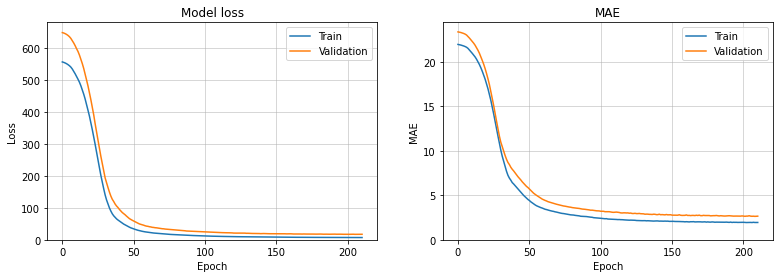

4/4 [==============================] - 0s 1ms/step - loss: 25.0069 - mean_absolute_error: 3.4114
MAE with the adam optimizer: 3.4114  reached in 9 s after 191 epochs


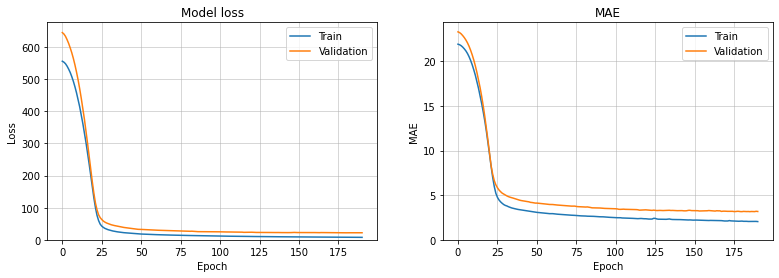

4/4 [==============================] - 0s 2ms/step - loss: 580.4038 - mean_absolute_error: 22.4080
MAE with the adagrad optimizer: 22.4080  reached in 13 s after 300 epochs


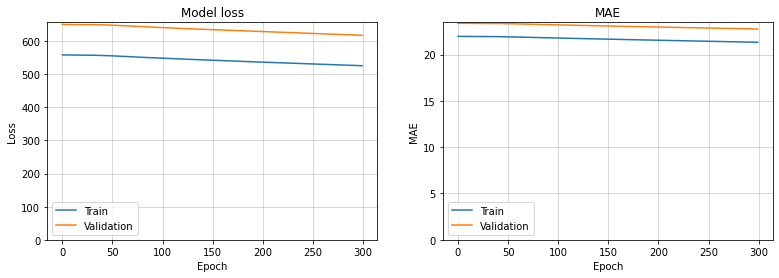

In [20]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.01, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=20, epochs=300, validation_split=0.3, callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

In [21]:
from tensorflow.keras import optimizers

In [22]:
model = initialize_model()
adam_optimizer = optimizers.Adam(learning_rate=0.1)
model = compile_model(model, adam_optimizer)
history = model.fit(X_train, y_train, batch_size=20, epochs=300, validation_split=0.3, callbacks=[es], verbose=1)

Epoch 1/300
15/15 [==============================] - 0s 18ms/step - loss: 385.8645 - mean_absolute_error: 17.1526 - val_loss: 207.4474 - val_mean_absolute_error: 11.3227
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 85.6221 - mean_absolute_error: 7.0710 - val_loss: 53.8966 - val_mean_absolute_error: 5.1156
Epoch 3/300
15/15 [==============================] - 0s 4ms/step - loss: 34.5536 - mean_absolute_error: 4.4200 - val_loss: 45.8636 - val_mean_absolute_error: 4.5541
Epoch 4/300
15/15 [==============================] - 0s 4ms/step - loss: 23.3601 - mean_absolute_error: 3.5601 - val_loss: 35.8726 - val_mean_absolute_error: 3.9085
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 23.0557 - mean_absolute_error: 3.5392 - val_loss: 33.8801 - val_mean_absolute_error: 4.2819
Epoch 6/300
15/15 [==============================] - 0s 4ms/step - loss: 16.6671 - mean_absolute_error: 2.9947 - val_loss: 30.6247 - val_mean_absolute_error: 3.8013
Epoch

Epoch 49/300
15/15 [==============================] - 0s 3ms/step - loss: 6.4021 - mean_absolute_error: 1.9644 - val_loss: 16.7130 - val_mean_absolute_error: 2.7884
Epoch 50/300
15/15 [==============================] - 0s 3ms/step - loss: 6.8132 - mean_absolute_error: 1.9978 - val_loss: 18.1903 - val_mean_absolute_error: 2.8054
Epoch 51/300
15/15 [==============================] - 0s 3ms/step - loss: 6.3365 - mean_absolute_error: 1.8985 - val_loss: 15.5607 - val_mean_absolute_error: 2.6056
Epoch 52/300
15/15 [==============================] - 0s 4ms/step - loss: 6.5451 - mean_absolute_error: 1.8766 - val_loss: 17.9505 - val_mean_absolute_error: 2.9402
Epoch 53/300
15/15 [==============================] - 0s 4ms/step - loss: 7.5763 - mean_absolute_error: 2.0561 - val_loss: 19.2661 - val_mean_absolute_error: 2.9474
Epoch 54/300
15/15 [==============================] - 0s 6ms/step - loss: 7.3051 - mean_absolute_error: 1.9745 - val_loss: 15.7099 - val_mean_absolute_error: 2.7058
Epoch 55/3

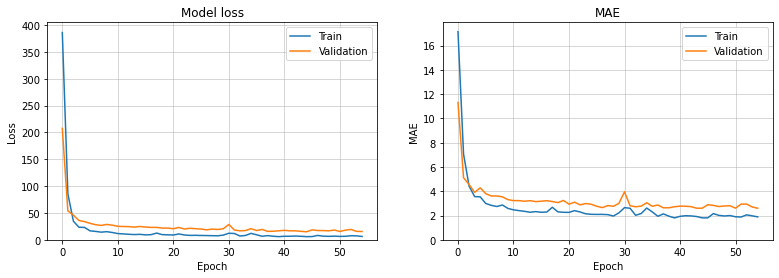

In [23]:
plot_loss_mae(history)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

4/4 [==============================] - 0s 2ms/step - loss: 37.0534 - mean_absolute_error: 4.8792
MAE with the 0.0001 learning rate: 4.8792 reached in 22 s after 500 epochs


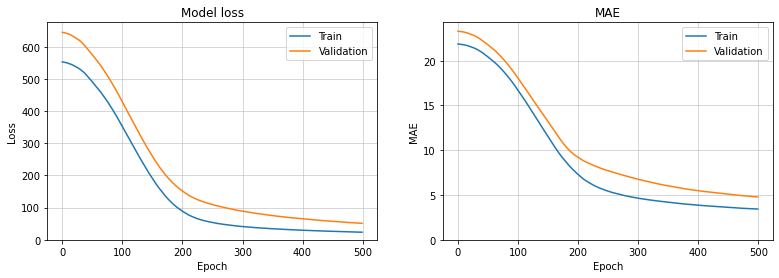

4/4 [==============================] - 0s 2ms/step - loss: 16.2483 - mean_absolute_error: 3.0877
MAE with the 0.001 learning rate: 3.0877 reached in 7 s after 124 epochs


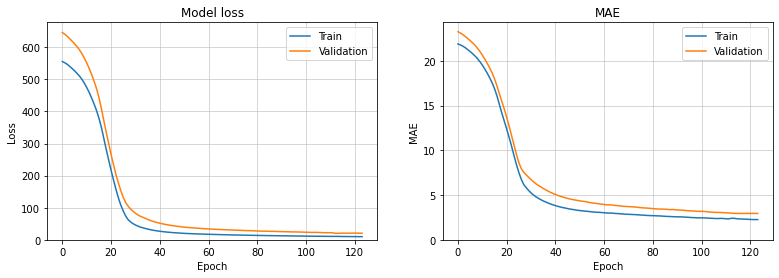

4/4 [==============================] - 0s 2ms/step - loss: 21.1033 - mean_absolute_error: 2.7800
MAE with the 0.01 learning rate: 2.7800 reached in 4 s after 90 epochs


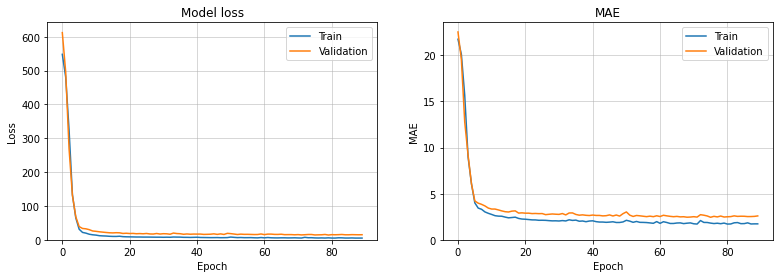

4/4 [==============================] - 0s 1ms/step - loss: 23.1134 - mean_absolute_error: 2.9706
MAE with the 0.1 learning rate: 2.9706 reached in 2 s after 37 epochs


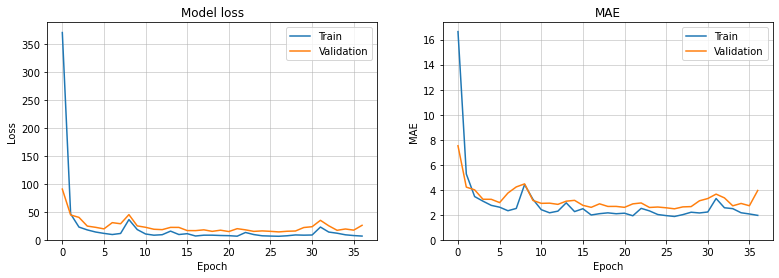

4/4 [==============================] - 0s 2ms/step - loss: 83.5567 - mean_absolute_error: 6.7081
MAE with the 1 learning rate: 6.7081 reached in 2 s after 14 epochs


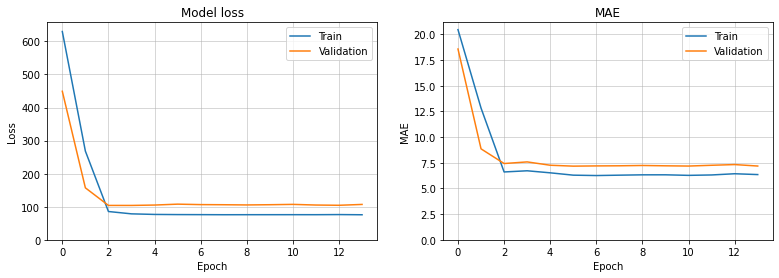

4/4 [==============================] - 0s 3ms/step - loss: 615.8578 - mean_absolute_error: 23.0784
MAE with the 5 learning rate: 23.0784 reached in 2 s after 11 epochs


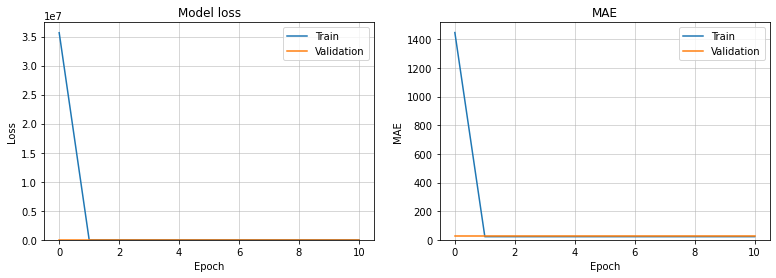

In [24]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    start_time = time.time()
    adam_optimizer = optimizers.Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model(model, adam_optimizer)  
    
    es = EarlyStopping(monitor='val_loss', mode='min', patience=10, min_delta=0.01, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
    #shuffle=True
    
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {lr} learning rate: {res:.4f} reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [25]:
def compile_model_metric(model, optimizer_name, loss_metric):
    model.compile(optimizer=optimizer_name, loss=loss_metric, metrics=['mean_absolute_error', 'mse'])    
    return model

4/4 [==============================] - 0s 2ms/step - loss: 2.8819 - mean_absolute_error: 2.8819 - mse: 19.7253
MAE with the 0.005 learning rate: 2.8819 reached in 4 s after 65 epochs


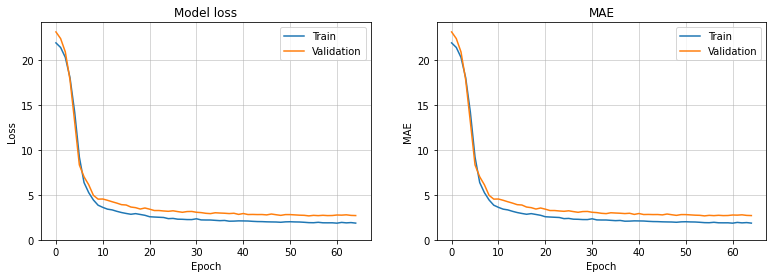

4/4 [==============================] - 0s 2ms/step - loss: 2.9635 - mean_absolute_error: 2.9635 - mse: 21.4383
MAE with the 0.01 learning rate: 2.9635 reached in 4 s after 72 epochs


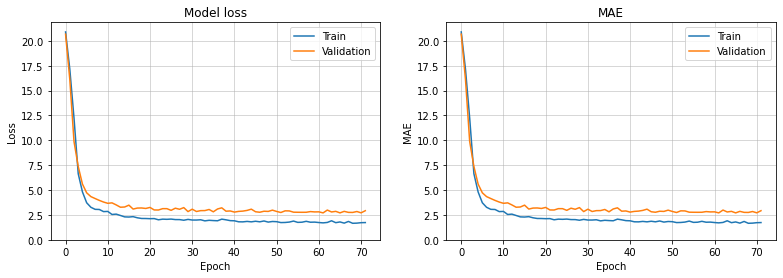

In [26]:
learning_rates = [0.005, 0.01]
for lr in learning_rates:
    start_time = time.time()
    adam_optimizer = optimizers.Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model_metric(model, adam_optimizer, 'mae')  
    
    es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, min_delta=0.01)
    history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
    
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {lr} learning rate: {res:.4f} reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

4/4 [==============================] - 0s 2ms/step - loss: 20.4783 - mean_absolute_error: 3.0745 - mse: 20.4783
MAE with the 0.005 learning rate: 3.0745 reached in 4 s after 68 epochs


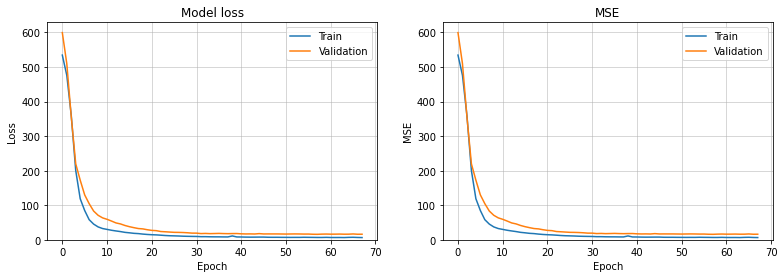

4/4 [==============================] - 0s 2ms/step - loss: 24.4519 - mean_absolute_error: 3.1841 - mse: 24.4519
MAE with the 0.01 learning rate: 3.1841 reached in 4 s after 80 epochs


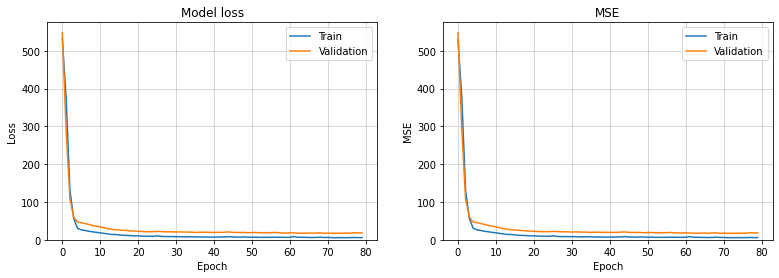

In [27]:
learning_rates = [0.005, 0.01]
for lr in learning_rates:
    start_time = time.time()
    adam_optimizer = optimizers.Adam(learning_rate=lr)
    model = initialize_model()
    model = compile_model_metric(model, adam_optimizer, 'mse')  
    
    es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10, min_delta=0.01)
    history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)
    
    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {lr} learning rate: {res:.4f} reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mse(history)

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [37]:
model = initialize_model()
lr = 0.005
adam_optimizer = optimizers.Adam(learning_rate=lr)
loss_metric = 'mse'
model.compile(optimizer=adam_optimizer, loss=loss_metric, metrics=['mean_absolute_error'])

In [38]:
es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=10)
history = model.fit(X_train, y_train, batch_size=20, epochs=500, validation_split=0.3, callbacks=[es], verbose=0)

MSE with the 0.005 learning rate: 2.8913 after 102 epochs


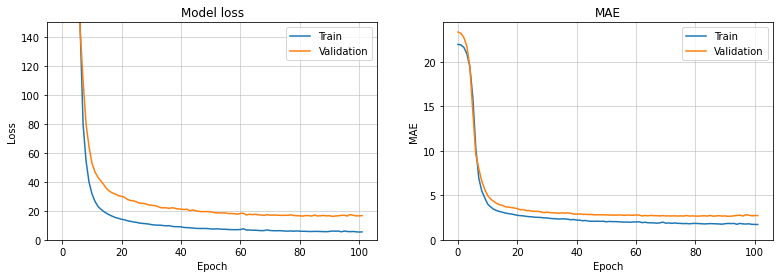

In [48]:
res = model.evaluate(X_test, y_test)[1]
print(f'MSE with the {lr} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [72]:
import tensorflow as tf

model.save('model_1')
models.save_model(model, 'adam_005_NN_model', overwrite=True, include_optimizer=True, save_format=None, 
                  signatures=None, options=None)

INFO:tensorflow:Assets written to: adam_005_NN_model\assets


In [78]:
loaded_model1 = models.load_model('model_1')
loaded_model = models.load_model('adam_005_NN_model')

y_check = tf.random.uniform((10, 13))
assert np.allclose(model.predict(x), loaded_model1.predict(x))
assert np.allclose(model.predict(y_check), loaded_model.predict(y_check))
np.testing.assert_allclose(model.predict(y_check), loaded_model.predict(y_check))

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [111]:
model_lr = initialize_model()

initial_learning_rate = 0.01
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=5000, decay_rate=0.7, staircase=False)
adam_optimizer = optimizers.Adam(learning_rate=lr_schedule)
loss_metric = 'mse'

model_lr.compile(optimizer=adam_optimizer, loss=loss_metric, metrics=['mean_absolute_error'])

In [112]:
es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=50)
history = model_lr.fit(X_train, y_train, batch_size=20, epochs=250, validation_split=0.3, callbacks=[es], verbose=0)

4/4 [==============================] - 0s 2ms/step - loss: 21.2558 - mean_absolute_error: 2.8753
MSE with the 0.005 learning rate: 2.8753 after 196 epochs


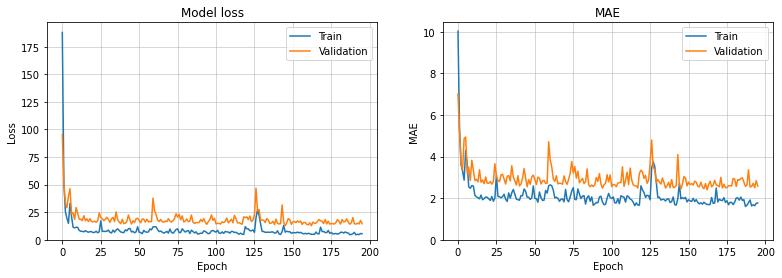

In [105]:
# With staircase=True and initial_learning_rate = 0.1
res = model_lr.evaluate(X_test, y_test)[1]
print(f'MSE with the {initial_learning_rate} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

4/4 [==============================] - 0s 2ms/step - loss: 23.2433 - mean_absolute_error: 2.8913
MSE with the 0.1 learning rate: 2.8913 after 171 epochs


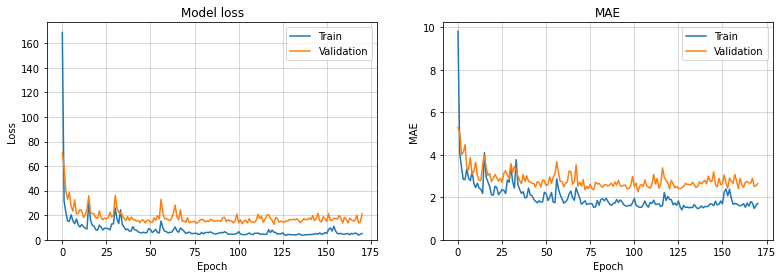

In [110]:
# With staircase=False and initial_learning_rate = 0.1
res = model_lr.evaluate(X_test, y_test)[1]
print(f'MSE with the {initial_learning_rate} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)

4/4 [==============================] - 0s 2ms/step - loss: 18.4421 - mean_absolute_error: 2.9063
MSE with the 0.01 learning rate: 2.9063 after 163 epochs


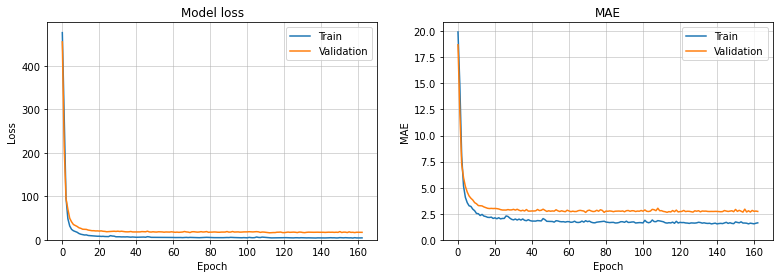

In [114]:
# With staircase=False and initial_learning_rate = 0.01
res = model_lr.evaluate(X_test, y_test)[1]
print(f'MSE with the {initial_learning_rate} learning rate: {res:.4f} after {len(history.epoch)} epochs')
plot_loss_mae(history)